# Problem statement
How good or bad does linear regression predict the price of the electricity in Spain? How do the non-fossil generations effect to the price? 

# Analyzing the data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
#import datasets
energydf= pd.read_csv("energy_dataset.csv")

## Cleaning the data

In [3]:
#Preview enery data
energydf

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


Next, find the columns that contain empty value or most of the columns; therefore we can drop it out for the data frame.

In [4]:
energydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [5]:
energydf.astype(bool).sum(axis=0)

time                                           35064
generation biomass                             35060
generation fossil brown coal/lignite           24547
generation fossil coal-derived gas                18
generation fossil gas                          35063
generation fossil hard coal                    35061
generation fossil oil                          35061
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption    22457
generation hydro run-of-river and poundage     35061
generation hydro water reservoir               35061
generation marine                                 19
generation nuclear                             35061
generation other                               35060
generation other renewable                     35061
generation solar                              

Dropping the unusable columns;

In [6]:
energydf = energydf.drop(['generation hydro pumped storage aggregated','forecast wind offshore eday ahead','generation fossil coal-derived gas','generation fossil oil shale','generation fossil peat','generation geothermal','generation marine','generation wind offshore'], axis=1)

In [7]:
# We will drop some data that we do not want to use to analyze
energydf = energydf.drop(['forecast solar day ahead','forecast wind onshore day ahead','total load forecast'], axis = 1)

Next, we'll check for the null/NaN on ecah columns. Since we get the data above that there is 35064 rows for each columns so we get and idea from the sum above that some the colums of energy data has missing data. Let's check!

In [8]:
# Finding null in ecah columns
energydf.isnull().sum(axis=0)

time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
total load actual                              36
price day ahead                                 0
price actual                                    0
dtype: int64

As the result above, we know that.the colums that has the most missing values is the total load actual, which is the sum of all colums. Next, we are going to find the location of this missing values.

In [9]:
energydf[energydf.isnull().any(axis=1)]


,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
99,2015-01-05 03:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21182.0,35.20,59.68
108,2015-01-05 12:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.50,79.14
109,2015-01-05 13:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.80,73.95
110,2015-01-05 14:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.50,71.93
111,2015-01-05 15:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,71.50
112,2015-01-05 16:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,71.85
113,2015-01-05 17:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.60,80.53
451,2015-01-19 19:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39304.0,70.01,88.95
452,2015-01-19 20:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39262.0,69.00,87.94
643,2015-01-27 19:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38335.0,66.00,83.97


In [10]:
#Since we want to use actual load as one of the variable, we need to get rid of the rows that has no vaule of actual load. 
energydf = energydf[energydf['total load actual'].notnull()]
energydf[energydf.isnull().any(axis=1)]

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
99,2015-01-05 03:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21182.0,35.20,59.68
451,2015-01-19 19:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39304.0,70.01,88.95
452,2015-01-19 20:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39262.0,69.00,87.94
643,2015-01-27 19:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38335.0,66.00,83.97
3968,2015-06-15 09:00:00+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30047.0,62.48,73.82
11236,2016-04-13 05:00:00+02:00,220.0,0.0,3390.0,1242.0,243.0,2270.0,1622.0,4515.0,7097.0,53.0,69.0,150.0,NaN,8596.0,23614.0,18.69,25.14
12672,2016-06-12 01:00:00+02:00,356.0,595.0,5719.0,6165.0,274.0,382.0,NaN,1325.0,5056.0,56.0,86.0,30.0,291.0,2019.0,24155.0,60.23,48.72
13391,2016-07-12 00:00:00+02:00,346.0,595.0,5951.0,6131.0,NaN,494.0,709.0,1215.0,5058.0,49.0,83.0,31.0,309.0,2031.0,25103.0,64.99,47.49
15982,2016-10-27 23:00:00+02:00,351.0,554.0,7176.0,5690.0,321.0,NaN,417.0,1295.0,6967.0,58.0,91.0,70.0,299.0,3193.0,26583.0,55.70,62.84
16612,2016-11-23 04:00:00+01:00,NaN,900.0,4838.0,4547.0,269.0,1413.0,795.0,435.0,5040.0,60.0,85.0,15.0,227.0,4598.0,23112.0,43.19,49.11


In [11]:
#Now I can drop some data the  contains null values in all individual columns;
energydf = energydf.drop([99,451,452,452,643,3968])

In [12]:
energydf[energydf.isnull().any(axis=1)]

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
11236,2016-04-13 05:00:00+02:00,220.0,0.0,3390.0,1242.0,243.0,2270.0,1622.0,4515.0,7097.0,53.0,69.0,150.0,NaN,8596.0,23614.0,18.69,25.14
12672,2016-06-12 01:00:00+02:00,356.0,595.0,5719.0,6165.0,274.0,382.0,NaN,1325.0,5056.0,56.0,86.0,30.0,291.0,2019.0,24155.0,60.23,48.72
13391,2016-07-12 00:00:00+02:00,346.0,595.0,5951.0,6131.0,NaN,494.0,709.0,1215.0,5058.0,49.0,83.0,31.0,309.0,2031.0,25103.0,64.99,47.49
15982,2016-10-27 23:00:00+02:00,351.0,554.0,7176.0,5690.0,321.0,NaN,417.0,1295.0,6967.0,58.0,91.0,70.0,299.0,3193.0,26583.0,55.70,62.84
16612,2016-11-23 04:00:00+01:00,NaN,900.0,4838.0,4547.0,269.0,1413.0,795.0,435.0,5040.0,60.0,85.0,15.0,227.0,4598.0,23112.0,43.19,49.11


Now, I want to  fill up the null values by using the average on each columns.

In [13]:
energydf.mean().round(1)

generation biomass                               383.5
generation fossil brown coal/lignite             448.1
generation fossil gas                           5622.5
generation fossil hard coal                     4255.7
generation fossil oil                            298.3
generation hydro pumped storage consumption      475.8
generation hydro run-of-river and poundage       972.1
generation hydro water reservoir                2604.4
generation nuclear                              6264.0
generation other                                  60.2
generation other renewable                        85.7
generation solar                                1432.9
generation waste                                 269.5
generation wind onshore                         5465.9
total load actual                              28696.2
price day ahead                                   49.9
price actual                                      57.9
dtype: float64

In [14]:
energydf = energydf.fillna(energydf.mean())

In [15]:
#check if there is any null valuse left
energydf[energydf.isnull().any(axis=1)]

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual


## Analying the data

After the data is ready to use for the model, we will split the data into individual years; therefore, we will see the trend of the model with a year data. 

In [16]:
#Now, we are going to sort the data into year 2015, 2016, 2017, and 2018.
energydf.index = pd.to_datetime(energydf.time, utc=True)
#Change the index to be the time 

In [17]:
# we will sort the time of into 4 years.
filter_time = energydf['2015':'2018']

In [18]:
fifteen = filter_time['2015']
sixteen = filter_time['2016']
seventeen = filter_time['2017']
eighteen = filter_time['2018']

This step, we will take only one year, 2015, to analyze first. This might help to see understand better on the linear regresssion model.

In [19]:
fifteen.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
count,8728.000000,8728.000000,8728.000000,8728.000000,8728.000000,8728.000000,8728.000000,8728.000000,8728.000000,8728.000000,8728.000000,8728.000000,8728.000000,8728.000000,8728.000000,8728.000000,8728.000000
mean,491.493469,514.984533,5056.101512,5347.317369,330.301673,533.891040,873.224679,2528.120532,6247.970898,78.012489,69.211159,1456.891728,223.177589,5481.749198,28355.488428,50.306624,61.375322
std,56.501369,382.832242,1504.967773,1970.806421,58.627637,790.019093,312.155628,1631.053301,856.516815,16.217058,5.902786,1674.534287,42.862350,3233.473915,4643.465136,12.362669,12.263084
min,101.000000,0.000000,1854.000000,803.000000,87.000000,0.000000,283.000000,170.000000,3712.000000,5.000000,14.000000,12.000000,39.000000,234.000000,18041.000000,4.000000,13.480000
25%,462.000000,0.000000,4078.000000,3866.500000,286.000000,0.000000,616.000000,1144.750000,5659.000000,80.000000,66.000000,81.750000,194.000000,2890.000000,24447.250000,43.100000,53.787500
50%,501.000000,603.000000,4672.000000,5755.000000,332.000000,114.500000,767.500000,2263.500000,6623.500000,84.000000,69.000000,639.500000,233.000000,4891.000000,28604.500000,51.150000,61.680000
75%,535.000000,906.000000,5564.250000,7094.000000,379.000000,795.000000,1138.000000,3577.250000,7084.000000,87.000000,73.000000,2619.500000,260.000000,7472.250000,31656.750000,60.000000,70.110000
max,590.000000,989.000000,12693.000000,8359.000000,449.000000,3870.000000,1726.000000,8837.000000,7115.000000,106.000000,87.000000,5668.000000,295.000000,17436.000000,40324.000000,85.050000,102.620000


In [20]:
# To build the linear regression, we need to indicate the X, the indepedent variable, and y, the depended varaible. 
X = fifteen[['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore']].values
y = fifteen['price actual'].values
# x and y on top are the value ONLY number in array the we will use to put into our regrresstion model. 
xx = fifteen[['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore']]
yy = fifteen[['price day ahead', 'price actual']]
# xx and yy and the columns the include the columns' name and their index.

We need to check how the dependent variable (y), which is the actual price, is distributed.

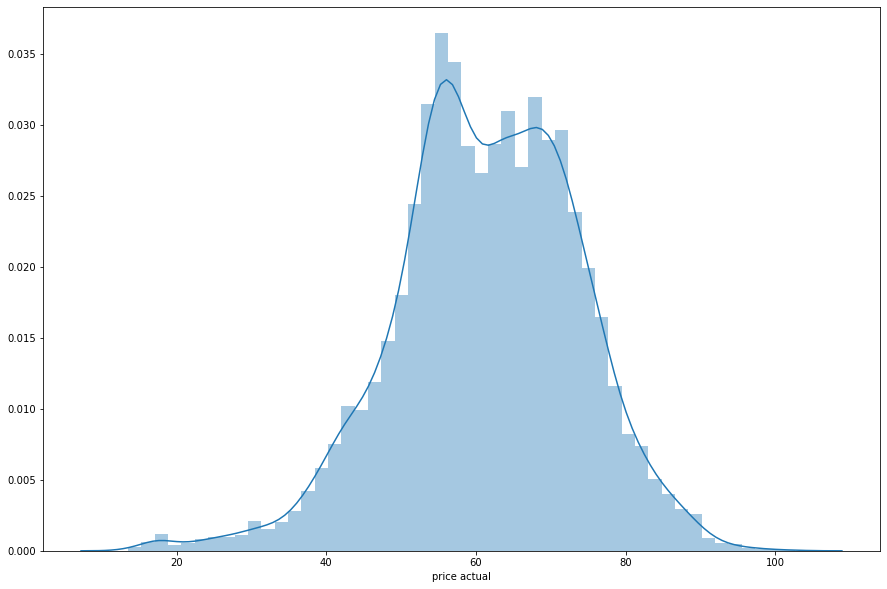

In [21]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(fifteen['price actual in 2015'])

Before feeding our data into the linear regression model, we need to split data into two parts. First part is 80% that will be used to prediction in the moddel and the second part is 20% that will be used for testing after get the model.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
# Fitting the 80% data into the regression model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

After we fit the train data to the regression model, we need to check how good/bad of the model with the data. We will use the 20% of that we split at the begining to find the score of the model.

In [24]:
print(regressor.score(X_test,y_test))

0.52329425443018


Since, the regression model is modeled from different variables to predict the "Price", we also want to find how does each variable has impact on the model. We will find the coefficient of each variables.

In [25]:
coeff_df = pd.DataFrame(regressor.coef_, xx.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
generation biomass,0.017268
generation fossil brown coal/lignite,-0.001671
generation fossil gas,0.001722
generation fossil hard coal,0.001408
generation fossil oil,0.012517
generation hydro pumped storage consumption,-0.003661
generation hydro run-of-river and poundage,-0.001327
generation hydro water reservoir,0.001941
generation nuclear,-0.000323
generation other,-0.077700


We will compare our prediction with the actual price from the data.

In [26]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(50)
df1

,Actual,Predicted
0,48.00,48.951439
1,72.47,66.604027
2,60.07,49.363313
3,73.88,70.929320
4,60.29,63.965180
5,73.01,71.019247
6,77.19,79.206140
7,68.98,78.811728
8,47.13,42.245066
9,42.15,60.409268


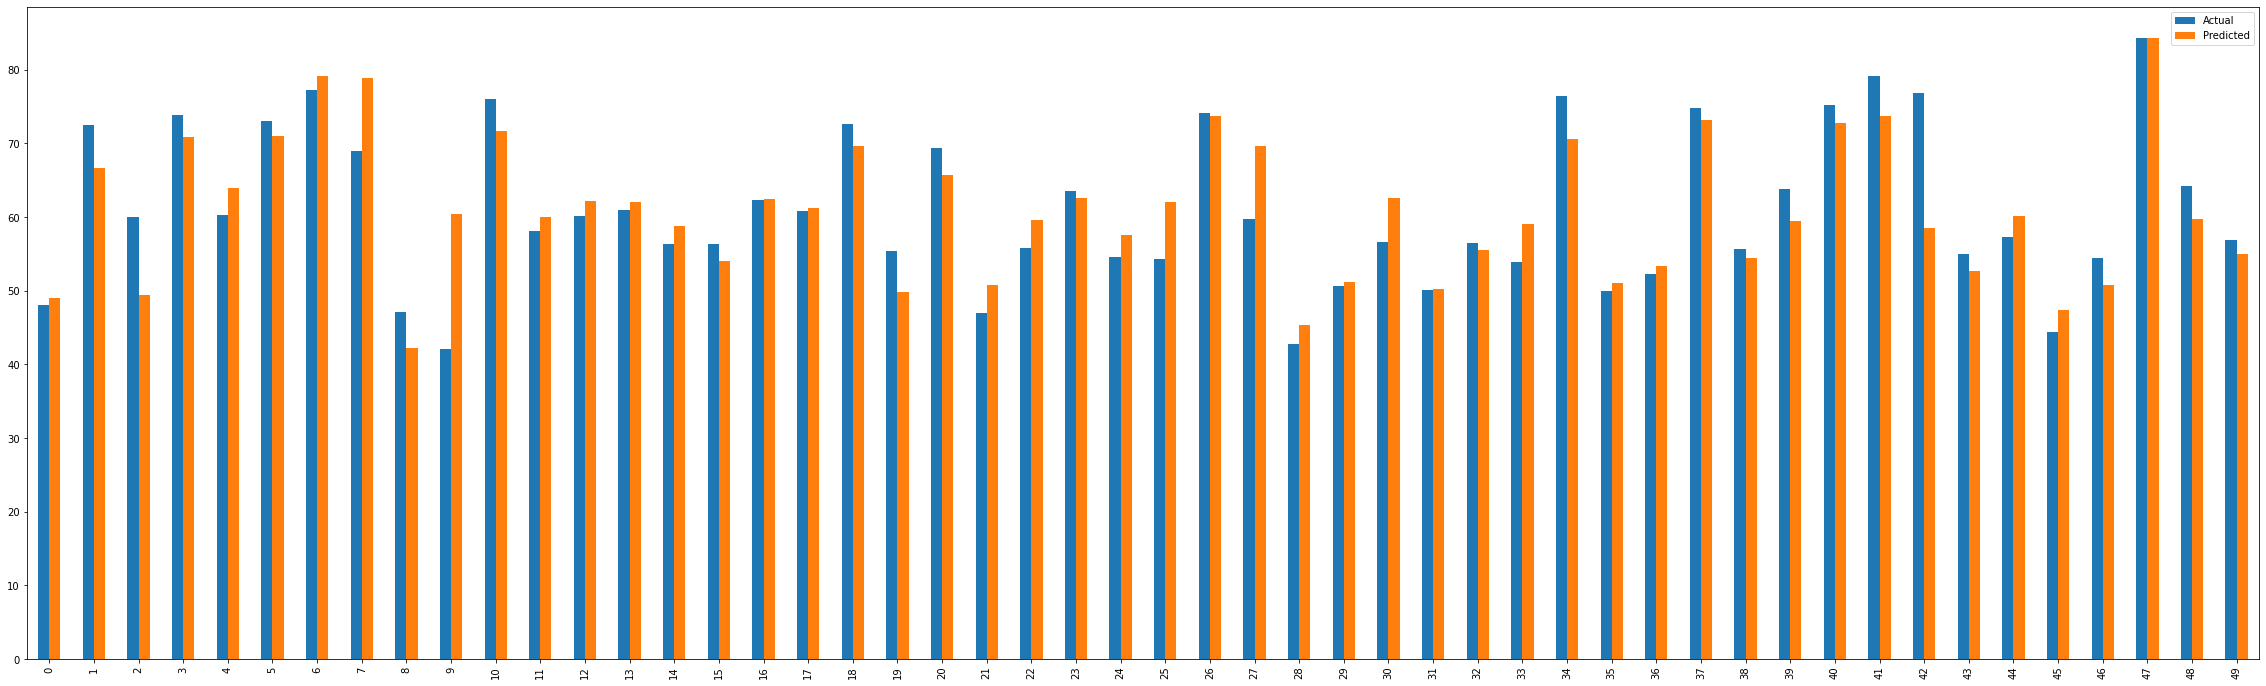

In [27]:
df1.plot(kind='bar',figsize=(40,12))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Finding the Errors or the prediction by linear regresssion.

In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.9655517932219215
Root Mean Squared Error: 8.38718281263274


Now, we want to see the our prediction and the actual price.

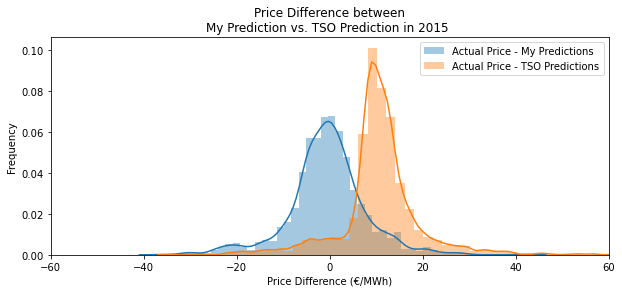

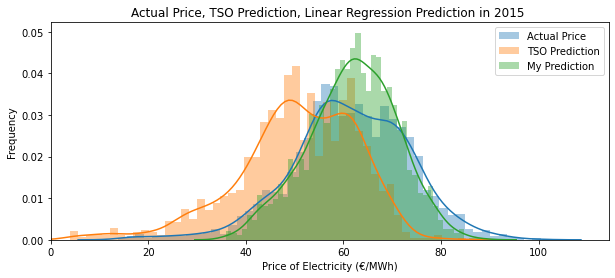

In [53]:
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.2, random_state=0)

diff1 = y_test['price actual'] - y_pred
diff2 = y_test['price actual'] - y_test['price day ahead']

plt.figure(figsize=(10,4))
gr = sns.distplot(diff1, bins=50, label='Actual Price - My Predictions')
gr = sns.distplot(diff2, bins=50, label='Actual Price - TSO Predictions')
gr.set(xlabel="Price Difference (€/MWh)", ylabel="Frequency")
gr.set_title('Price Difference between\nMy Prediction vs. TSO Prediction in 2015 ')
gr.set(xlim=(-60,60))
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
gr = sns.distplot(y_test['price actual'], bins=50, label='Actual Price')
gr = sns.distplot(y_test['price day ahead'], bins=50, label='TSO Prediction')
gr = sns.distplot(y_pred, bins=50, label='My Prediction')
gr.set(xlabel="Price of Electricity (€/MWh)", ylabel="Frequency")
gr.set_title('Actual Price, TSO Prediction, Linear Regression Prediction in 2015 ')
gr.set(xlim=(0,None))
plt.legend()
plt.show()

## Analzeing in year 2016

### USE ALL THE DATA TO PREDICT THE PRICE

In [30]:
energydf.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
count,35023.000000,35023.000000,35023.000000,35023.000000,35023.000000,35023.000000,35023.000000,35023.000000,35023.000000,35023.000000,35023.000000,35023.000000,35023.000000,35023.000000,35023.000000,35023.000000,35023.000000
mean,383.521158,448.127459,5622.466722,4255.689918,298.330649,475.788676,972.071926,2604.369871,6263.961797,60.236388,85.651029,1432.858065,269.503512,5465.859921,28696.236216,49.869219,57.885665
std,85.302485,354.601503,2201.939058,1961.414172,52.467597,792.563597,400.752495,1834.913161,838.309885,20.234774,14.063131,1680.283581,50.141001,3213.526549,4574.143173,14.618448,14.190443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1077.000000,5760.000000,53.000000,74.000000,71.000000,240.000000,2935.000000,24807.500000,41.490000,49.350000
50%,367.000000,509.000000,4968.000000,4473.000000,300.000000,68.000000,906.000000,2163.000000,6564.000000,57.000000,88.000000,616.000000,279.000000,4850.000000,28901.000000,50.520000,58.010000
75%,433.000000,757.000000,6428.500000,5837.000000,330.000000,616.000000,1250.000000,3755.000000,7024.000000,80.000000,97.000000,2578.000000,310.000000,7399.000000,32191.500000,60.530000,68.000000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,41015.000000,101.990000,116.800000


In [31]:
# To build the linear regression, we need to indicate the X, the indepedent variable, and y, the depended varaible. 
X_all = energydf[['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore']].values
y_all = energydf['price actual'].values
# X_all and y_all on top are the value ONLY number in array the we will use to put into our regrresstion model. 
xx_all = energydf[['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore']]
yy_all = energydf[['price day ahead', 'price actual']]
# xx_all and yy_all and the columns the include the columns' name and their index.

We want to visualize how overall actual price in the easy way by using graph.

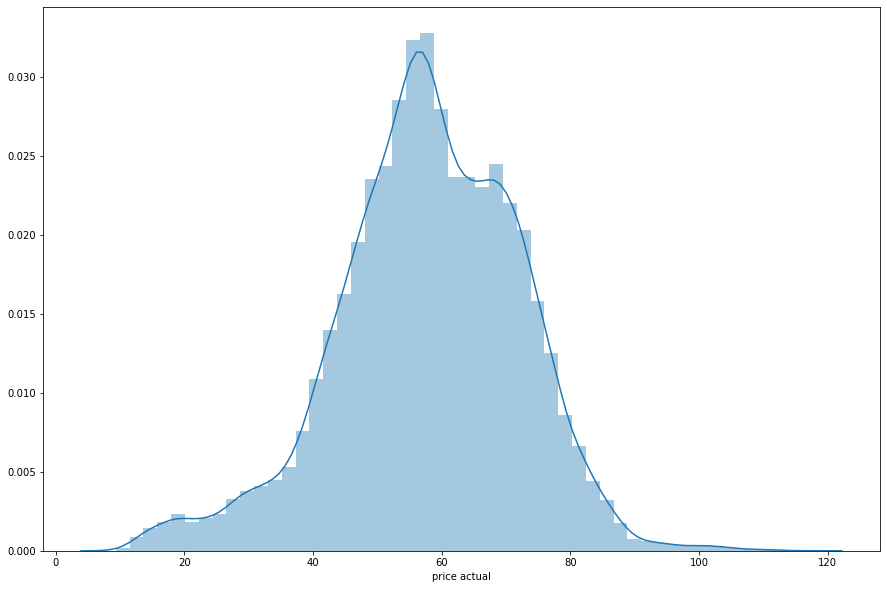

In [32]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(energydf['price actual'])

In [33]:
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)

In [36]:
# Fitting the 80% data into the regression model
regressor_all = LinearRegression()  
regressor_all.fit(X_all_train, y_all_train)

LinearRegression()

In [37]:
print(regressor_all.score(X_all_test,y_all_test))

0.37355007622832237


In [38]:
coeff_all = pd.DataFrame(regressor_all.coef_, xx_all.columns, columns=['Coefficient'])  
coeff_all

,Coefficient
generation biomass,0.027834
generation fossil brown coal/lignite,-0.000045
generation fossil gas,0.001307
generation fossil hard coal,0.002189
generation fossil oil,-0.011236
generation hydro pumped storage consumption,-0.003092
generation hydro run-of-river and poundage,0.001683
generation hydro water reservoir,0.000400
generation nuclear,0.000121
generation other,0.045531


In [48]:
y_all_pred = regressor.predict(X_all_test)
y_all_pred
y_all_test
df2 = pd.DataFrame({'Actual': y_all_test,'Predicted': y_all_pred})
df_2 = df2.head(50)
df_2

,Actual,Predicted
0,67.13,64.335076
1,92.16,72.095231
2,62.03,68.290498
3,55.26,60.355366
4,57.80,61.611628
5,77.09,69.219515
6,57.20,62.159097
7,82.61,66.987953
8,32.67,35.875082
9,62.15,59.389427


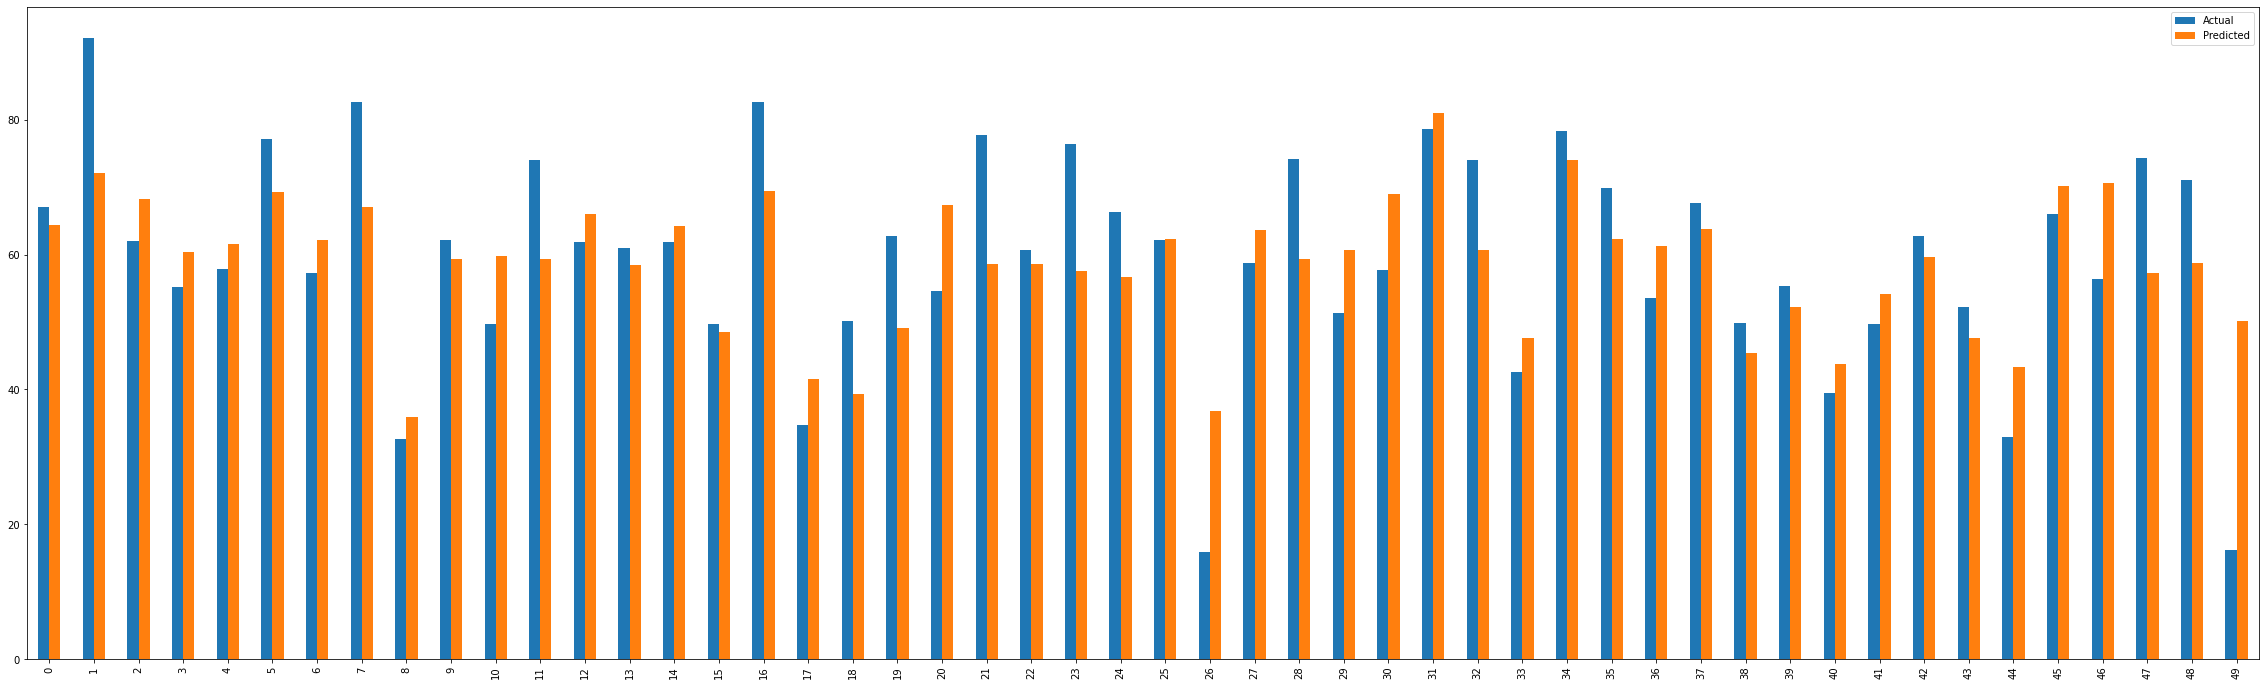

In [49]:
df_2.plot(kind='bar',figsize=(40,12))

plt.show()

In [50]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_all_test, y_all_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_all_test, y_all_pred)))

Mean Absolute Error: 8.404035198566946
Root Mean Squared Error: 11.08894403179311


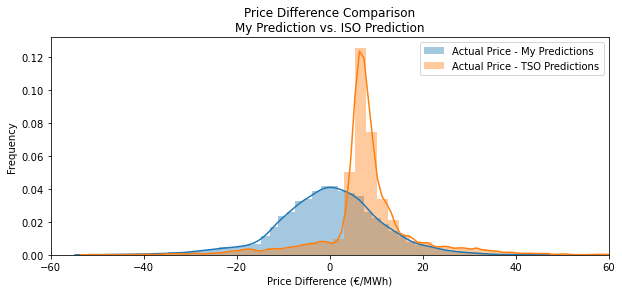

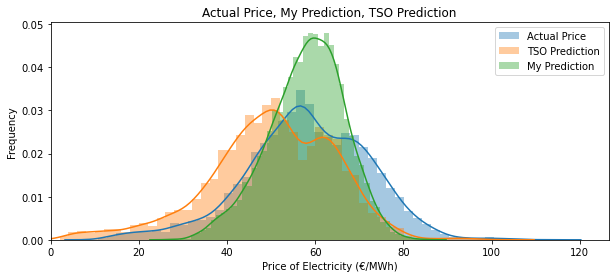

In [51]:
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(xx_all, yy_all, test_size=0.2, random_state=0)

diff1 = y_all_test['price actual'] - y_all_pred
diff2 = y_all_test['price actual'] - y_all_test['price day ahead']

plt.figure(figsize=(10,4))
gr2 = sns.distplot(diff1, bins=50, label='Actual Price - My Predictions')
gr2 = sns.distplot(diff2, bins=50, label='Actual Price - TSO Predictions')
gr2.set(xlabel="Price Difference (€/MWh)", ylabel="Frequency")
gr2.set_title('Price Difference Comparison\nMy Prediction vs. ISO Prediction')
gr2.set(xlim=(-60,60))
plt.legend()
plt.show()

plt.figure(figsize=(10,4))
gr2 = sns.distplot(y_all_test['price actual'], bins=50, label='Actual Price')
gr2 = sns.distplot(y_all_test['price day ahead'], bins=50, label='TSO Prediction')
gr2 = sns.distplot(y_all_pred, bins=50, label='My Prediction')
gr2.set(xlabel="Price of Electricity (€/MWh)", ylabel="Frequency")
gr2.set_title('Actual Price, My Prediction, TSO Prediction')
gr2.set(xlim=(0,None))
plt.legend()
plt.show()